<img src="https://i.imgur.com/6U6q5jQ.png"/>

In [4]:
import networkx as nx
from pyvis.network import Network

In [35]:
nx.write_graphml(dG, "dG.graphml")
nx.write_gml(dG, "dG.gml")

# Case: Elites in Peru

Let's use the data from the spreadsheet to prepare our table:

In [1]:
# reading in
import pandas as pd
import os

FigueData = pd.read_excel(os.path.join("graphdata","dataFigueroa.xlsx"),
                          index_col=0) #notice!!!!!

The **adjacency matrix** does not need the _multinacional_ attribute column, then:

In [2]:
varsToDrop=['Multinacional']
adjacency=FigueData.drop(varsToDrop,axis=1) 

In [5]:
EliteNet = nx.from_pandas_adjacency(adjacency)

In [6]:
EliteNet.remove_edges_from(nx.selfloop_edges(EliteNet))

In [7]:
attributeToAdd=dict(zip(FigueData.index,FigueData['Multinacional']))
nx.set_node_attributes(EliteNet, attributeToAdd,'multi')

Setting color of node:

In [8]:
colors={e:'red' if v==1 else 'green' for e,v in nx.get_node_attributes(EliteNet,"multi").items()}
nx.set_node_attributes(EliteNet, colors, "color")

### Exercise 1 
<div class="alert-success">

1. Plot a colored version of the nodes based on attributes of the previous plot.
2. Plot using Pyvis.
3. Export the network: **nx.write_gml(EliteNet, os.path.join("graphdata","EliteNet.gml"))**
4. Open the exported network in R and Gephi. Plot the graphs.    
</div>

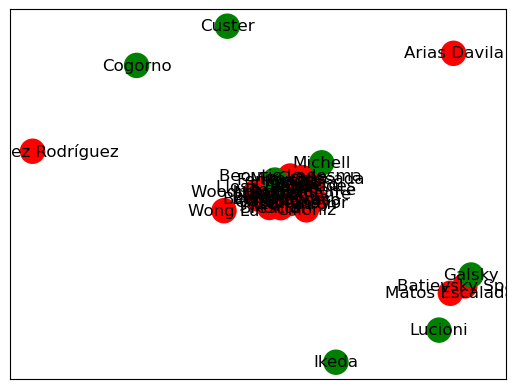

In [10]:
# use the edge attributes
# add labels to edges
# add color to edges

edge_colors=nx.get_edge_attributes(EliteNet,'color').values()
colors_for_nodes=nx.get_node_attributes(EliteNet,'color').values()
weight_values=nx.get_edge_attributes(EliteNet,'weight')
pos = nx.spring_layout(EliteNet) 

# draw nodes first
nx.draw_networkx_nodes(EliteNet,pos,
                       node_color=colors_for_nodes)
# draw edges
nx.draw_networkx_edges(EliteNet, pos,
                       edge_color= edge_colors)
# draw node labels
nx.draw_networkx_labels(EliteNet, pos)

final_dG=nx.draw_networkx_edge_labels(EliteNet,pos,
                               edge_labels=weight_values)

In [11]:
dGvis = Network('500px', '500px',notebook=True,cdn_resources='remote',directed=True)
dGvis.from_nx(EliteNet.copy())
dGvis.show('dGvis.html')

In [13]:
nx.write_gml(EliteNet, os.path.join("graphdata","EliteNet.gml"))

# Case: Trade among countries

<div class="alert alert-danger">
  <strong>CHALLENGE!</strong> 
    
* Create a network creating all the edges from the whole dataset.
    
* Plot the network in R, Gephi and Python. Is there any issue?    
</div>

In [16]:
tradeDF=pd.read_pickle(os.path.join("graphdata","tradeData_forGraph.pkl"))
tradeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Common Name      252 non-null    object
 1   Membership       252 non-null    object
 2   Type             248 non-null    object
 3   Membership_list  252 non-null    object
 4   year_inforce_ok  252 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 10.0+ KB


Let´s keep the countries per row:

In [17]:
RFTA_countryLists=tradeDF['Membership_list']
RFTA_countryLists

0      [Algeria, Angola, Benin, Botswana, Burkina Fas...
1                                   [Afghanistan, India]
2                                   [Afghanistan, India]
3                                      [Albania, Turkey]
4          [Bolivia, Colombia, Ecuador, Peru, Venezuela]
                             ...                        
247                                [United States, Oman]
248                                [United States, Peru]
249                           [United States, Singapore]
250                             [United States, Vietnam]
251    [Benin, Burkina Faso, Cote d'Ivoire, Mali, Nig...
Name: Membership_list, Length: 252, dtype: object

In [18]:
from itertools import combinations
listOfTuples=[]
for listOfMembers in RFTA_countryLists:
    for country1, country2 in combinations(sorted(listOfMembers),2):
        listOfTuples.append((country1, country2))

# see 
listOfTuples

[('Algeria', 'Angola'),
 ('Algeria', 'Benin'),
 ('Algeria', 'Botswana'),
 ('Algeria', 'Burkina Faso'),
 ('Algeria', 'Burundi'),
 ('Algeria', 'Cameroon'),
 ('Algeria', 'Cape Verde'),
 ('Algeria', 'Central African Republic'),
 ('Algeria', 'Chad'),
 ('Algeria', 'Comoros'),
 ('Algeria', 'Congo'),
 ('Algeria', "Cote d'Ivoire"),
 ('Algeria', 'Djibouti'),
 ('Algeria', 'Egypt'),
 ('Algeria', 'Equatorial Guinea'),
 ('Algeria', 'Ethiopia'),
 ('Algeria', 'Gabon'),
 ('Algeria', 'Gambia'),
 ('Algeria', 'Ghana'),
 ('Algeria', 'Guinea'),
 ('Algeria', 'Guinea Bissau'),
 ('Algeria', 'Kenya'),
 ('Algeria', 'Lesotho'),
 ('Algeria', 'Liberia'),
 ('Algeria', 'Libya'),
 ('Algeria', 'Madagascar'),
 ('Algeria', 'Malawi'),
 ('Algeria', 'Mali'),
 ('Algeria', 'Mauritania'),
 ('Algeria', 'Mauritius'),
 ('Algeria', 'Mozambique'),
 ('Algeria', 'Namibia'),
 ('Algeria', 'Niger'),
 ('Algeria', 'Nigeria'),
 ('Algeria', 'Rwanda'),
 ('Algeria', 'Sahrawi'),
 ('Algeria', 'Sao Tome and Principe'),
 ('Algeria', 'Senegal'),
 

Let's count each time a tuple happens:

In [19]:
pd.Series(listOfTuples).value_counts().reset_index()

,index,count
0,"(Denmark, United Kingdom)",50
1,"(Belgium, United Kingdom)",49
2,"(Germany, United Kingdom)",49
3,"(Netherlands, United Kingdom)",49
4,"(Luxembourg, United Kingdom)",49
...,...,...
4922,"(Dominica, Finland)",1
4923,"(Dominica, France)",1
4924,"(Dominica, Germany)",1
4925,"(Dominica, Greece)",1


We can prepare a dataframe:

In [20]:
newNames={'index':'countryTuple',	'count':'weight'}
tuplesAndWeights=pd.DataFrame(pd.Series(listOfTuples).value_counts()).reset_index(drop=False).rename(columns=newNames)
tuplesAndWeights

,countryTuple,weight
0,"(Denmark, United Kingdom)",50
1,"(Belgium, United Kingdom)",49
2,"(Germany, United Kingdom)",49
3,"(Netherlands, United Kingdom)",49
4,"(Luxembourg, United Kingdom)",49
...,...,...
4922,"(Dominica, Finland)",1
4923,"(Dominica, France)",1
4924,"(Dominica, Germany)",1
4925,"(Dominica, Greece)",1


Let's create separate columns:

In [21]:
tuplesAndWeights[['country1','country2']]=tuplesAndWeights['countryTuple'].to_list()
tuplesAndWeights

,countryTuple,weight,country1,country2
0,"(Denmark, United Kingdom)",50,Denmark,United Kingdom
1,"(Belgium, United Kingdom)",49,Belgium,United Kingdom
2,"(Germany, United Kingdom)",49,Germany,United Kingdom
3,"(Netherlands, United Kingdom)",49,Netherlands,United Kingdom
4,"(Luxembourg, United Kingdom)",49,Luxembourg,United Kingdom
...,...,...,...,...
4922,"(Dominica, Finland)",1,Dominica,Finland
4923,"(Dominica, France)",1,Dominica,France
4924,"(Dominica, Germany)",1,Dominica,Germany
4925,"(Dominica, Greece)",1,Dominica,Greece


In [22]:
RFTA_net=nx.from_pandas_edgelist(tuplesAndWeights, source='country1',target='country2',edge_attr=["weight"])

In [23]:
RFTA_net.edges.data()

EdgeDataView([('Denmark', 'United Kingdom', {'weight': 50}), ('Denmark', 'Italy', {'weight': 48}), ('Denmark', 'Netherlands', {'weight': 48}), ('Denmark', 'Belgium', {'weight': 48}), ('Denmark', 'Germany', {'weight': 48}), ('Denmark', 'Luxembourg', {'weight': 48}), ('Denmark', 'France', {'weight': 47}), ('Denmark', 'Ireland', {'weight': 47}), ('Denmark', 'Greece', {'weight': 45}), ('Denmark', 'Portugal', {'weight': 45}), ('Denmark', 'Spain', {'weight': 44}), ('Denmark', 'Austria', {'weight': 36}), ('Denmark', 'Sweden', {'weight': 36}), ('Denmark', 'Finland', {'weight': 35}), ('Denmark', 'Estonia', {'weight': 15}), ('Denmark', 'Hungary', {'weight': 15}), ('Denmark', 'Latvia', {'weight': 15}), ('Denmark', 'Lithuania', {'weight': 15}), ('Denmark', 'Malta', {'weight': 15}), ('Denmark', 'Cyprus', {'weight': 15}), ('Denmark', 'Poland', {'weight': 15}), ('Denmark', 'Czech Republic', {'weight': 15}), ('Denmark', 'Slovak Republic', {'weight': 15}), ('Denmark', 'Slovenia', {'weight': 15}), ('Den

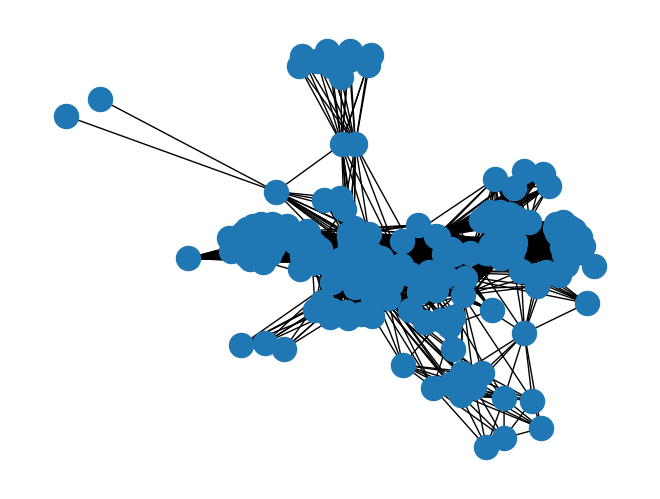

In [24]:
nx.draw(RFTA_net)

In [25]:
len(RFTA_net.nodes()),len(RFTA_net.edges())

(216, 4927)

We are not supposed to have isolates:

In [26]:
list(nx.isolates(RFTA_net))

[]

There should not be self loops:

In [27]:
nx.number_of_selfloops(RFTA_net) # RFTA_net.remove_edges_from(nx.selfloop_edges(RFTA_net))

2

In [28]:
# which are they?
nx.number_connected_components(RFTA_net)


1

We may remove those edges:

In [ ]:
# RFTA_netvis = Network('800px', '800px',notebook=True,cdn_resources='remote',directed=False)
# RFTA_netvis.from_nx(RFTA_net.copy())
# RFTA_netvis.show('RFTA_netvis.html')

In [32]:
# dict of labels
labels={i:str(i) for i in RFTA_net.nodes()}
labels # string as label
nx.set_node_attributes(RFTA_net,labels,'label') # values according to id

In [34]:
colorEdges={i:'grey' if v==1 else 'green' for i,v in nx.get_edge_attributes(RFTA_net, "weight").items()}
nx.set_edge_attributes(RFTA_net,values=colorEdges,name='color')

In [35]:
nx.write_gml(RFTA_net, os.path.join("graphdata","RFTA_net.gml"))